In [1]:
from mpl_toolkits import mplot3d

from mpl_toolkits.mplot3d import axes3d    
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import math

fig = plt.figure()
ax = plt.axes(projection="3d")

%matplotlib notebook
plt.show()

In [3]:
def get_random(best_para, low, high):
    flag = True
    while flag:
        x_temp = np.random.randn() + best_para[0]
        y_temp = np.random.randn() + best_para[1]
        if x_temp >= low and x_temp <= high and y_temp >= low and y_temp <= high:
            flag = False
        else:
            continue
    return np.array([x_temp, y_temp],dtype=np.float32)
        
def get_reward(z):
    return z_function(z[0],z[1])

In [4]:
def ploting(best_para):
    global X,Y
    time.sleep(.1)
    x1 = best_para[0]; y1 = best_para[1]
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax.plot_wireframe(X, Y, Z, color='green')
    ax.scatter(x1,y1,z_function(x1,y1), s = 100, color='red')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()
    plt.contourf(X,Y,Z, levels=[*np.linspace(-1,1,10)])
    plt.scatter(x1,y1,s = 50, color='red')
    plt.show()
    clear_output(wait=True)

In [5]:
low = -6
high = 6
sigma = 0.5
batch_size = 10

def z_function(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = z_function(X, Y)

x1 = np.random.randint(low,high)
y1 = np.random.randint(low,high)
nos = 100
best_para = np.array([x1,y1], dtype=np.float32)*sigma
best_value = -math.inf

 iteration 99 Best value 0.9999982415524893 with position at [ 0.03595847 -1.5685089 ]

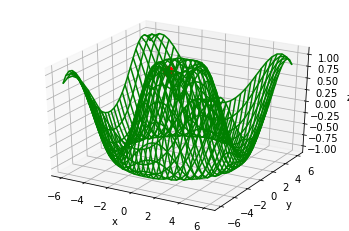

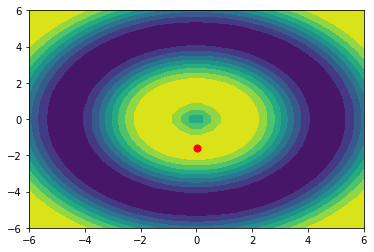

In [6]:
for i in range(nos):
    memory = [best_para + sigma*get_random(best_para,low,high) for _ in range(batch_size)]
    reward = [get_reward(z) for z in memory]
    best_weight_pos = np.array(reward).argsort()[-1]
    if reward[best_weight_pos] > best_value:
        best_value = reward[best_weight_pos]
        best_para = memory[best_weight_pos]
        ploting(best_para)
    #plotgraph(best_para)
    print('\r iteration {} Best value {} with position at {}'.format(i,best_value, best_para), end = '')
ploting(best_para)